## Задачи:


- Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

- Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 


- Сколько транзакций завершились ошибкой?


- Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.


Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)

- Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

- Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

- Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
transaction_data = pd.read_csv('transaction_data.csv', encoding='utf-8')

In [23]:
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [24]:
transaction_data.shape

(5315, 3)

In [66]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [67]:
transaction_data = transaction_data.drop_duplicates()

In [26]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [27]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [28]:
transaction_data['date'] = pd.to_datetime(transaction_data.date)

In [124]:
transaction_data.head()

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню?

In [36]:
transaction = transaction_data.groupby('transaction', as_index=False) \
                .agg({'name':'count'}) \
                .rename(columns={'name':'count_transaction'})

In [37]:
transaction

,transaction,count_transaction
0,cancelled,1619
1,error,4
2,successfull,3692


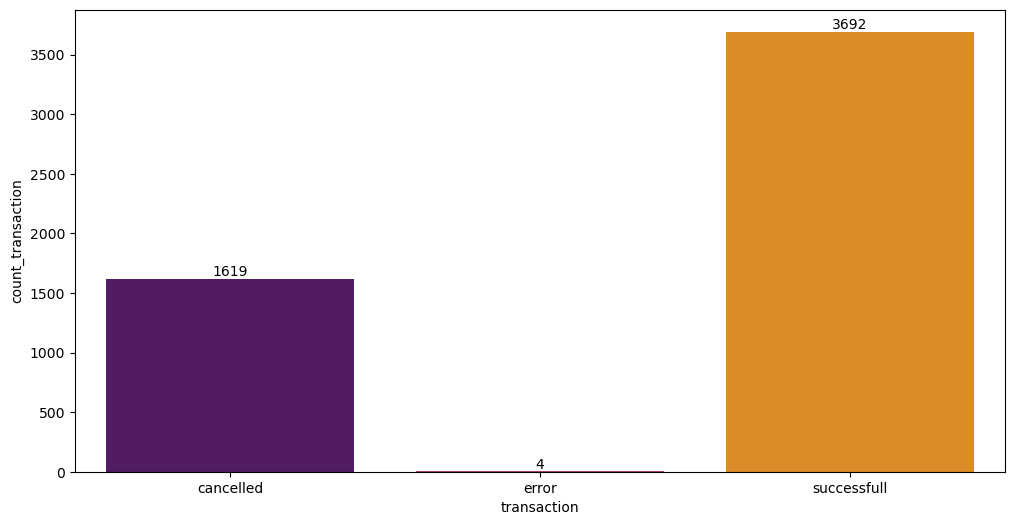

In [53]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=transaction, x='transaction', y='count_transaction', palette='inferno')
ax.bar_label(ax.containers[0]);

# Данный график показывает сколько успешных/неуспешных и ошибочных транзакций было сделано пользователями

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [71]:
successfull_transaction = transaction_data.query('transaction == "successfull"') \
                .groupby('name') \
                .agg({'transaction':'count'}) \
                .rename(columns={'transaction':'count_transaction'})

In [72]:
successfull_transaction.head()

,count_transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68


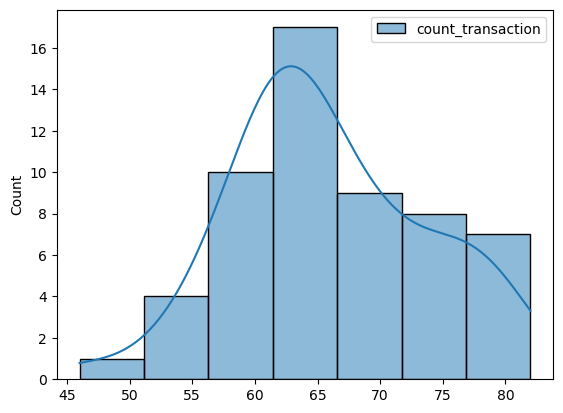

In [77]:
sns.histplot(successfull_transaction, kde=True);

In [79]:
successfull_transaction.describe()

,count_transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


Создать сводную таблицу по новым данным:

In [80]:
transactions_2 = pd.read_csv('transaction_data_updated.csv', encoding='utf-8')

In [155]:
transaction_number = transactions_2.groupby(['name', 'minute'], as_index=False) \
                                .agg({'transaction':'count'}) \
                                .rename(columns={'transaction':'transaction_number'})

In [156]:
user_vs_minute_pivot = transaction_number.pivot(index='minute', columns='name', values='transaction_number')

In [157]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)
# Заполняю пропущенные значения нулями 

In [158]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


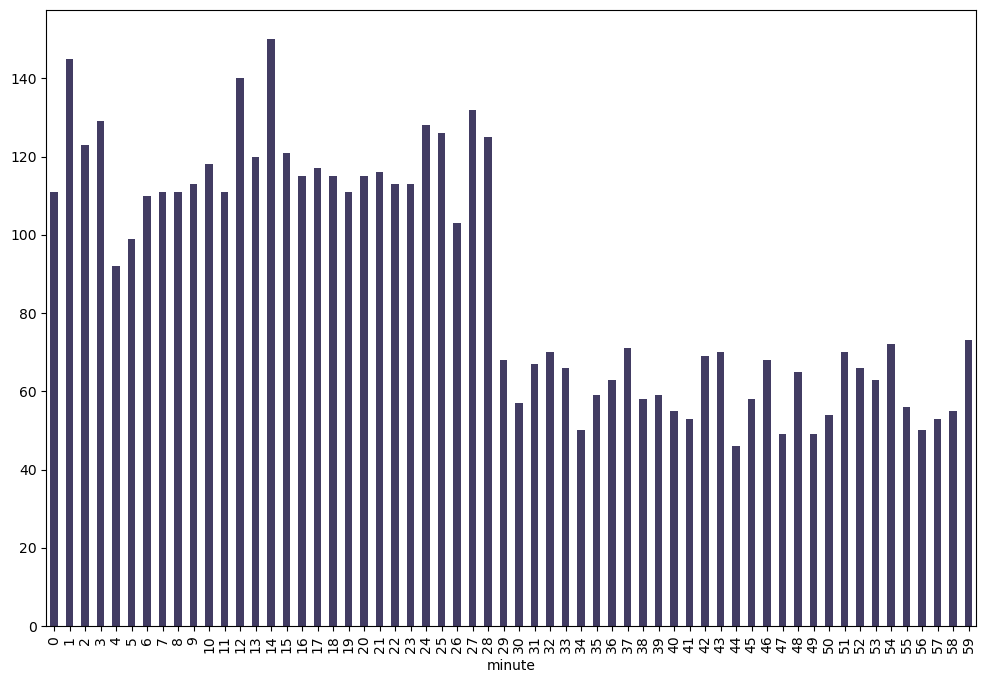

In [204]:
user_vs_minute_pivot.sum(axis = 1).plot.bar(figsize=(12,8), color='#423c63');
# Предоставленный график коллегой по моим данным из pivot таблицы

В данном графике значения слева значительно превосходят значения справа. Это связано с тем, что данные записывались с полуночи, а извлечены были только минуты, хотя по факту прошли часы. Проблема графика заключена в этом. Исправляю ее.

In [146]:
transactions_2['date'] = pd.to_datetime(transactions_2['date'])

In [178]:
transactions_2 = transactions_2.drop(['minute'], axis=1)

In [185]:
transactions_2

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [179]:
transactions_2['true_minute'] = transaction_data['date'].dt.minute + transaction_data['date'].dt.hour * 60

In [186]:
transaction_number = transactions_2.groupby(['name', 'true_minute'], as_index=False) \
                                .agg({'transaction':'count'}) \
                                .rename(columns={'transaction':'transaction_number'})

In [187]:
transaction_number

,name,true_minute,transaction_number
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2
...,...,...,...
3306,Vasilisa_Smirnova,82,2
3307,Vasilisa_Smirnova,85,1
3308,Vasilisa_Smirnova,86,1
3309,Vasilisa_Smirnova,87,2


In [188]:
user_vs_minute_pivot_2 = transaction_number.pivot(index='true_minute', columns='name', values='transaction_number')

In [190]:
user_vs_minute_pivot_2 = user_vs_minute_pivot_2.fillna(0)

In [191]:
user_vs_minute_pivot_2

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
true_minute,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,4.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0
86,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
87,3.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


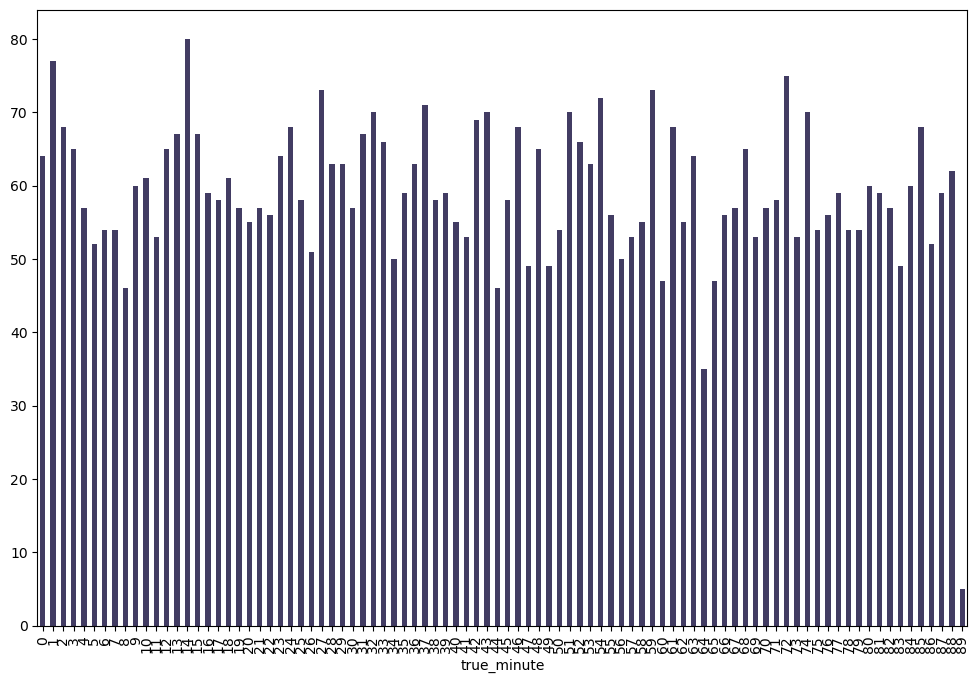

In [203]:
user_vs_minute_pivot_2.sum(axis = 1).plot.bar(figsize=(12,8), color='#423c63');
# Предоставленный график коллегой по моим данным из pivot таблицы